# Résults

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib 
import pandas as pd

In [2]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
matplotlib.rcParams.update({'font.size': 10})

In [30]:
ds_nosort=pd.read_csv('Resultats_tests_PANGEO_HPC-JEAN-ZAY-mono.csv') 
ds=ds_nosort.sort_values(by=['Cores'])

In [31]:
ds

,Queue,Nb Noeuds,Workers,Cores,Memory in GB,Resultat1 in sec,Resultat2 in sec,Resultat3 in sec
0,cpu-p1,1,2,2,171.80,3143,3126,NaN
1,cpu-p1,1,28,28,161.06,291,291,290.0
2,cpu-p1,1,40,40,161.06,281,281,281.0
4,prepost,1,48,48,2200.00,234,234,234.0
3,cpu-p1,2,80,80,161.06,187,186,186.0


In [32]:
workers=ds['Workers']
cores=ds['Cores']
memory=ds['Memory in GB']
results=ds[['Resultat1 in sec','Resultat2 in sec','Resultat3 in sec']]
mean_results=results.mean(axis=1)

In [33]:
min_worker=workers.min()
argmin_worker=workers.idxmin()
result_min=mean_results[argmin_worker]
scale=result_min/(workers/min_worker)

/Users/auraoupa/anaconda2/envs/pangeo-cloud/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/auraoupa/anaconda2/envs/pangeo-cloud/lib/python3.6/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/auraoupa/anaconda2/envs/pangeo-cloud/lib/python3.6/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


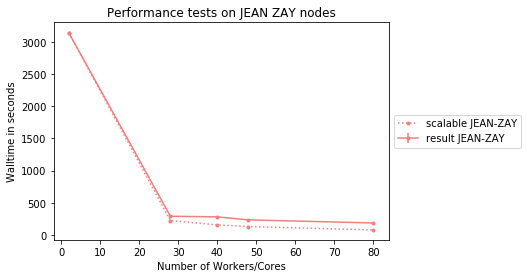

In [19]:
fig, ax = plt.subplots()
fig.figsize=(8, 8)
plt.errorbar(workers, results.mean(axis=1), yerr=results.std(axis=1),
             ls='-',marker='o',ms=3,color='lightcoral', 
             label='result JEAN-ZAY')
plt.plot(workers, scale, 
             ls=':',marker='o',ms=3,color='lightcoral', 
             label='scalable JEAN-ZAY')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Number of Workers/Cores')
plt.ylabel('Walltime in seconds')
plt.title('Performance tests on JEAN ZAY nodes')
plt.savefig('Perf-jz-workers.png', bbox_inches='tight')

In [21]:
ds_mem=ds_nosort.sort_values(by=['Memory in GB'])
workers_mem=ds_mem['Workers']
cores_mem=ds_mem['Cores']
memory_mem=ds_mem['Memory in GB']
results_mem=ds_mem[['Resultat1 in sec','Resultat2 in sec','Resultat3 in sec']]
mean_results_mem=results.mean(axis=1)
min_memory=memory_mem.min()
argmin_memory=memory_mem.idxmin()
result_min_memory=mean_results_mem[argmin_memory]
scale_memory=result_min_memory/(memory/min_memory)

In [23]:
ds_mem

,Queue,Nb Noeuds,Workers,Cores,Memory in GB,Resultat1 in sec,Resultat2 in sec,Resultat3 in sec
1,cpu-p1,1,28,28,161.06,291,291,290.0
2,cpu-p1,1,40,40,161.06,281,281,281.0
3,cpu-p1,2,80,80,161.06,187,186,186.0
0,cpu-p1,1,2,2,171.80,3143,3126,NaN
4,prepost,1,48,48,2200.00,234,234,234.0


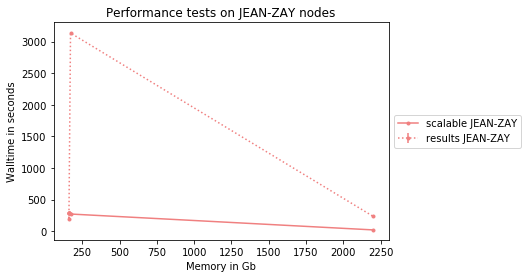

In [22]:
fig, ax = plt.subplots()
fig.figsize=(8, 8)
plt.errorbar(memory, results.mean(axis=1), yerr=results.std(axis=1),
             ls=':',marker='o',ms=3,color='lightcoral', 
             label='results JEAN-ZAY')
plt.plot(memory, scale_memory, 
             ls='-',marker='o',ms=3,color='lightcoral', 
             label='scalable JEAN-ZAY')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Memory in Gb')
plt.ylabel('Walltime in seconds')
plt.title('Performance tests on JEAN-ZAY nodes')
plt.savefig('Perf-jz-memory.png', bbox_inches='tight')

In [24]:
ds_multi_nosort=pd.read_csv('Resultats_tests_PANGEO_HPC-JEAN-ZAY-multi.csv') 
ds_multi=ds_multi_nosort.sort_values(by=['Cores'])

In [25]:
ds_multi

,Queue,Nb Noeuds,Workers,Cores,Memory in GB,Resultat1 in sec,Resultat2 in sec,Resultat3 in sec
0,cpu-p1,1,7,28,161.06,284,284,284
1,cpu-p1,1,8,40,161.06,292,293,291
3,prepost,1,8,48,2200.00,257,255,257
2,cpu-p1,2,10,80,161.06,195,187,185


In [26]:
workers_multi=ds_multi['Workers']
cores_multi=ds_multi['Cores']
memory_multi=ds_multi['Memory in GB']
results_multi=ds_multi[['Resultat1 in sec','Resultat2 in sec','Resultat3 in sec']]
mean_results_multi=results_multi.mean(axis=1)

In [37]:
cores[1:]

1    28
2    40
4    48
3    80
Name: Cores, dtype: int64

In [36]:
cores_multi

0    28
1    40
3    48
2    80
Name: Cores, dtype: int64

In [28]:
results.mean(axis=1)

1     290.666667
2     281.000000
3     186.333333
0    3134.500000
4     234.000000
dtype: float64

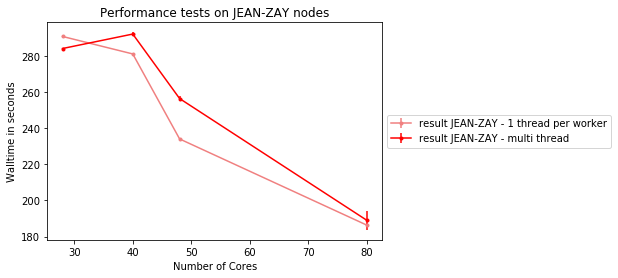

In [38]:
fig, ax = plt.subplots()
fig.figsize=(8, 8)
plt.errorbar(cores[1:], results[1:].mean(axis=1), yerr=results[1:].std(axis=1),
             ls='-',marker='o',ms=3,color='lightcoral', 
             label='result JEAN-ZAY - 1 thread per worker')
plt.errorbar(cores_multi, results_multi.mean(axis=1), yerr=results_multi.std(axis=1),
             ls='-',marker='o',ms=3,color='red', 
             label='result JEAN-ZAY - multi thread')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Number of Cores')
plt.ylabel('Walltime in seconds')
plt.title('Performance tests on JEAN-ZAY nodes')
plt.savefig('Perf-jz-cores-mono-multi.png', bbox_inches='tight')